In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
#sns.set(style="ggplot")
#sns.set_palette(sns.color_palette("muted"))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.style.use("ggplot")
sns.set_palette("plasma")
from rake_nltk import Rake
import numpy as np

In [235]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('./job_skills.csv')

In [4]:
df.head()

Company                                              Title  \
0  Google                       Google Cloud Program Manager   
1  Google  Supplier Development Engineer (SDE), Cable/Con...   
2  Google  Data Analyst, Product and Tools Operations, Go...   
3  Google            Developer Advocate, Partner Engineering   
4  Google     Program Manager, Audio Visual (AV) Deployments   

                       Category                          Location  \
0            Program Management                         Singapore   
1  Manufacturing & Supply Chain                   Shanghai, China   
2           Technical Solutions       New York, NY, United States   
3           Developer Relations  Mountain View, CA, United States   
4            Program Management      Sunnyvale, CA, United States   

                                    Responsibilities  \
0  Shape, shepherd, ship, and show technical prog...   
1  Drive cross-functional activities in the suppl...   
2  Collect and analyze data to draw insight and i...   
3  Work one-on-one with the top Android, iOS, and...   
4  Plan requirements with internal customers.\nPr...   

                              Minimum Qualifications  \
0  BA/BS degree or equivalent practical experienc...   
1  BS degree in an Engineering discipline or equi...   
2  Bachelor’s degree in Business, Economics, Stat...   
3  BA/BS degree in Computer Science or equivalent...   
4  BA/BS degree or equivalent practical experienc...   

                            Preferred Qualifications  
0  Experience in the business technology market a...  
1  BSEE, BSME or BSIE degree.\nExperience of usin...  
2  Experience partnering or consulting cross-func...  
3  Experience as a software developer, architect,...  
4  CTS Certification.\nExperience in the construc...

### Job Category

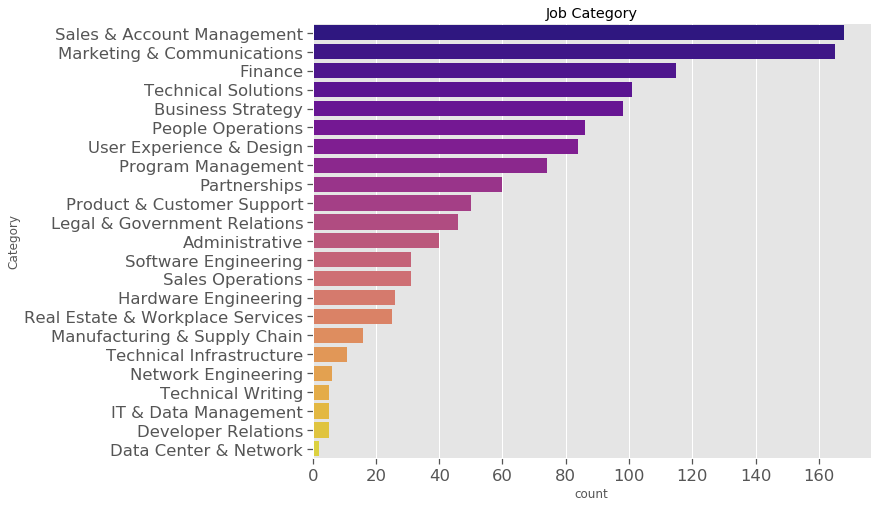

In [38]:
fig, _ = plt.subplots(figsize=(10,8))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='plasma')
plt.title('Job Category')
plt.show()

We can see that there are a lot of vacancys not directly connected with IT. 

In [6]:
df['Country'] = df.Location.apply(lambda x: x.split(', ')[-1])

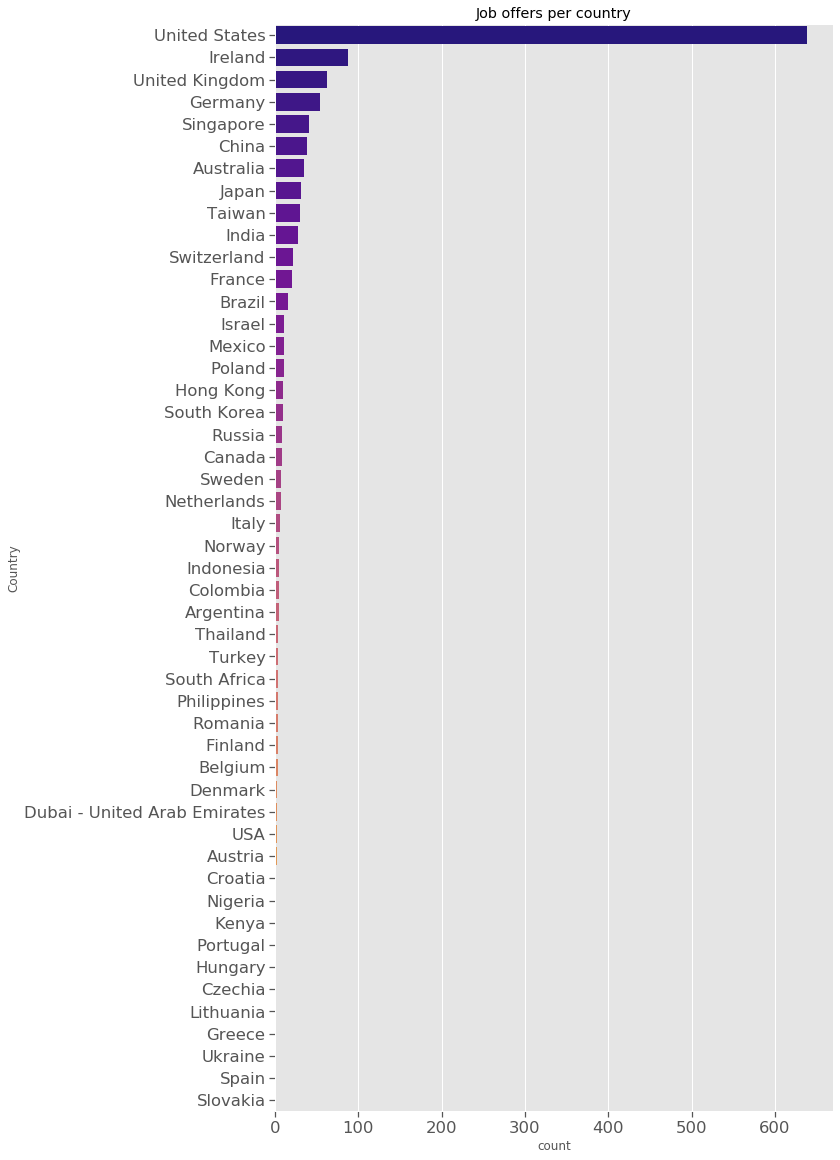

In [54]:
fig, _ = plt.subplots(figsize=(10,20))
sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index, palette='plasma')
plt.title('Job offers per country')
plt.show()

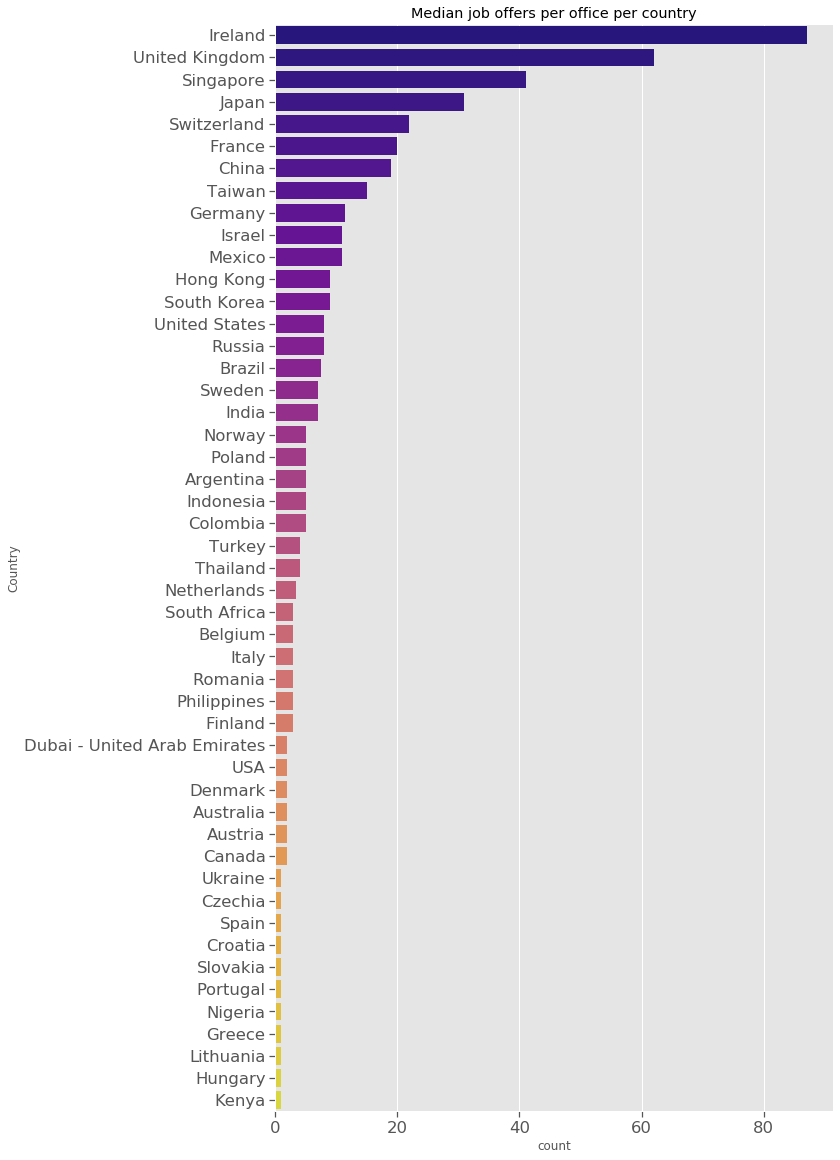

In [55]:
fig, ax = plt.subplots(figsize=(10,20))
df_temp = (
    df
    .groupby(['Country'])
    .Location
    .value_counts().rename('counter').reset_index()
    .groupby(['Country'])
    .counter.median()
    .rename('count').reset_index().sort_values(by='count', ascending=False)
)

sns.barplot(
    data=df_temp, 
    y='Country', x='count', palette='plasma'
)
plt.title('Median job offers per office per country')
plt.show()

The USA has the largest job recruitment. But there is another picture per office.

### Position per job cattegory

In [56]:
df['norm_title'] = df.Title.apply(lambda x: x.split(' '))

In [9]:
position = [('Analyst', 'Analyst'), ('Manager','Manager'), ('Engineer', 'Engineer')]
def find_word(x, list_of_words):
    for i in list_of_words:
        if i[0] in x:
            return i[1]
df['Position'] = df.Title.apply(lambda x: find_word(x, position))

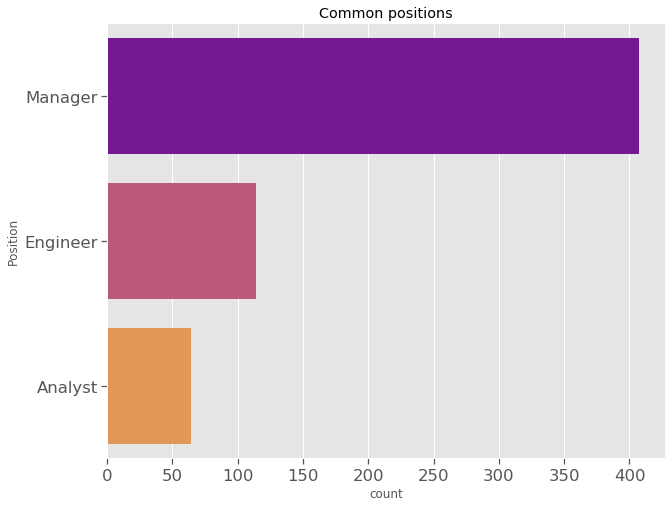

In [57]:
fig, _ = plt.subplots(figsize=(10,8))
sns.countplot(data=df, y='Position', order=df['Position'].value_counts().index, palette='plasma')
plt.title('Common positions')
plt.show()

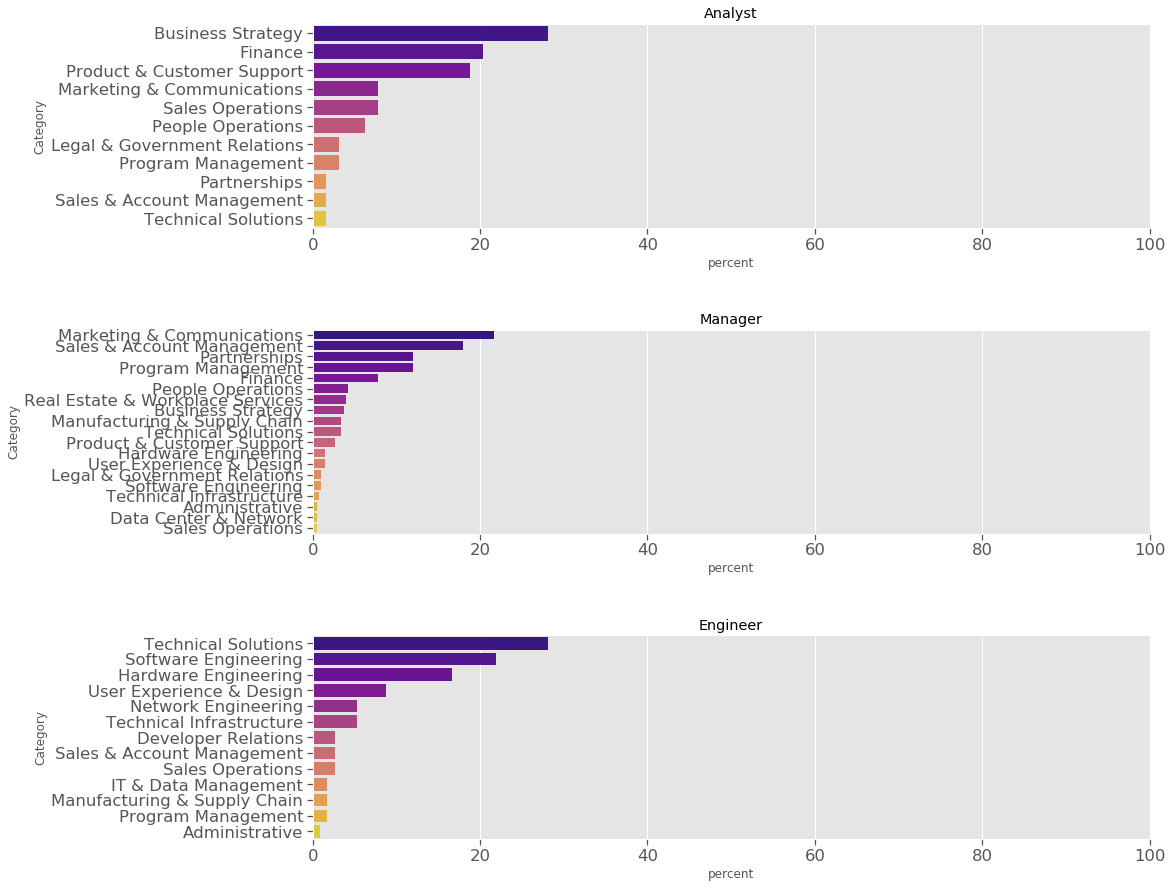

In [60]:
fig, ax = plt.subplots(figsize=(15,15), ncols=1, nrows=3)
df_temp = (
df
     .groupby(['Position'])
     .Category
     .value_counts(normalize=True).mul(100).rename('percent').reset_index()
)

for i, _name in enumerate(position):
    sns.barplot(
        data=df_temp[df_temp.Position==_name[1]], 
        y='Category', x='percent',palette='plasma', ax=ax[i]
    )
    ax[i].set_title(_name[1])
    ax[i].set_xlim(0, 100)
    
plt.subplots_adjust(hspace=0.5)
plt.show()

As expected Engineers are mostly in development divisions and Analysts are in Finance and Strategy divisions.

### Degrees

In [14]:
degree = [
    ("BA/BS", "Bachelor"),
    ("Bachelor", "Bachelor"),
    ("Master", "Master"),
    ("MS", "Master"),
    ("M.S.", "Master"), 
    ("Phd","Phd"),
    ("PhD", "Phd"),
    ("Ph.d","Phd"),
    ("Doctor", "Phd"),
    ("MBA", "MBA")
]

In [15]:
df['Minimum Qualifications Degree'] = df['Minimum Qualifications'].apply(lambda x: find_word(str(x), degree))
df['Preferred Qualifications Degree'] = df['Preferred Qualifications'].apply(lambda x: find_word(str(x), degree))
df.loc[df['Preferred Qualifications Degree'].isna(), ['Preferred Qualifications Degree']] = df.loc[df['Preferred Qualifications Degree'].isna(), ['Minimum Qualifications Degree']].values

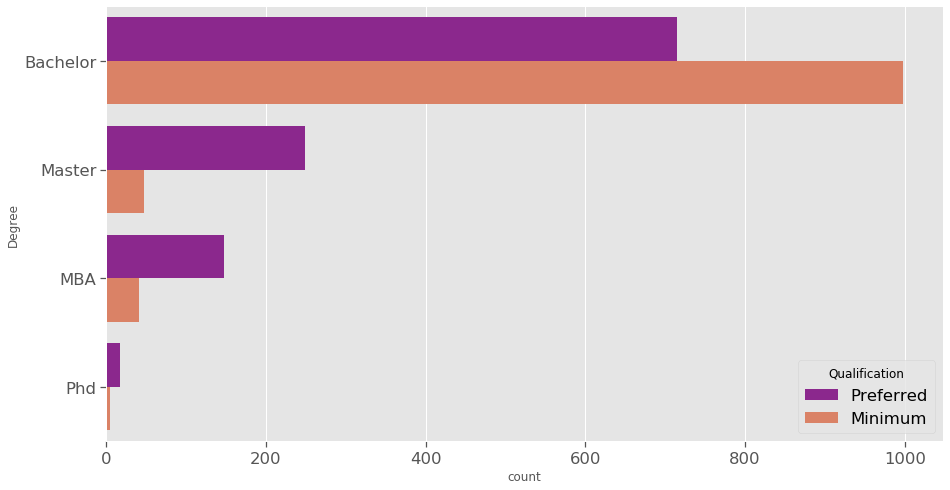

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
l = len(list(df['Preferred Qualifications Degree']))
df_degree = pd.DataFrame({
    "Degree": list(df['Preferred Qualifications Degree']) + list(df['Minimum Qualifications Degree']),
    "Qualification": ["Preferred"] * l + ["Minimum"] * l,
    "Position": list(df['Position']) + list(df['Position'])
})
sns.countplot(data=df_degree, y='Degree', hue='Qualification', order=["Bachelor", "Master", "MBA", "Phd"],palette='plasma')
plt.show()

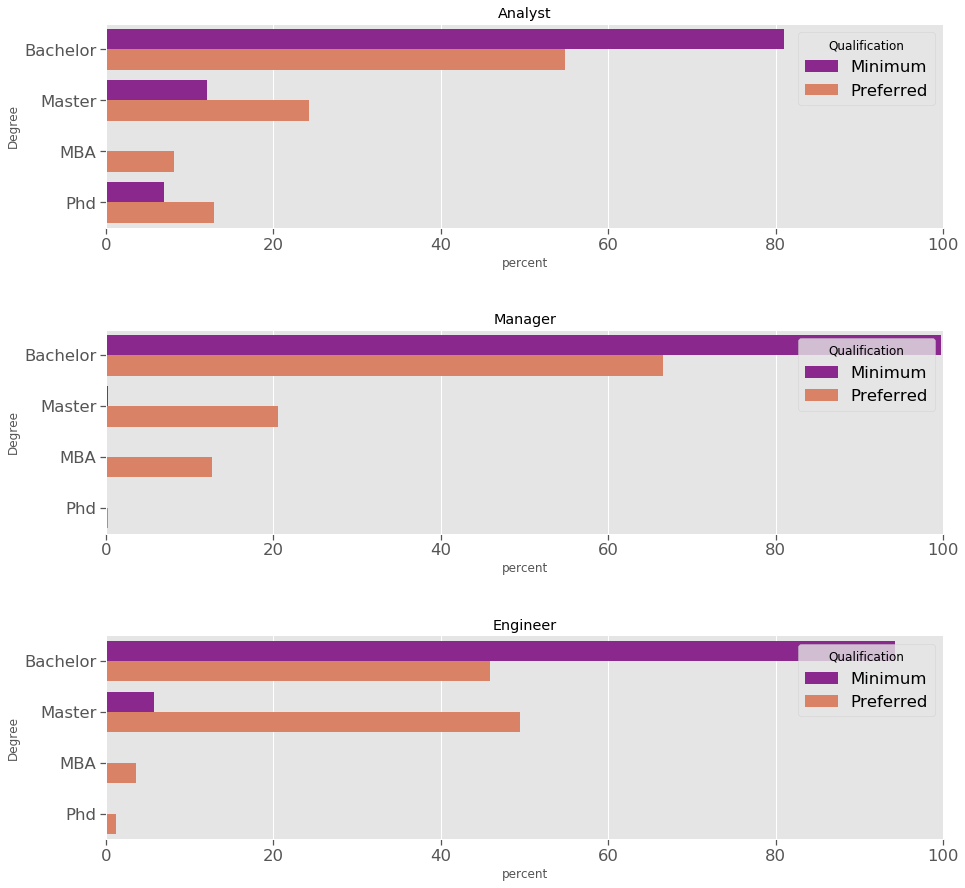

In [17]:
fig, ax = plt.subplots(figsize=(15,15), ncols=1, nrows=3)
df_temp = (
df_degree
     .groupby(['Position', 'Qualification'])
     .Degree
     .value_counts(normalize=True).mul(100).rename('percent').reset_index()
)

for i, _name in enumerate(position):
    sns.barplot(
        data=df_temp[df_temp.Position==_name[1]], 
        y='Degree', x='percent', hue='Qualification',
        order=["Bachelor", "Master", "MBA", "Phd"],palette='plasma', ax=ax[i]
    )
    ax[i].set_title(_name[1])
    ax[i].set_xlim(0, 100)
    
plt.subplots_adjust(hspace=0.5)
plt.show()

Mostly PhD degree is needed for Analysts.  
If you don't have a master or PhD degree, don't be upset. You should apply anyway=)

In [18]:
def key_phrases(x, top=10):
    r = Rake()
    r.extract_keywords_from_text(str(x))
    return r.get_ranked_phrases_with_scores()[:top]

df['Key Responsibilities'] = df.Responsibilities.apply(key_phrases)

In [19]:
languages = [('Python'), ('S-Plus'), ('PHP'), ('Perl'), ('Javascript', 'JS'), ('SPSS'), ('SQL', 'MySQL'), ('SAS'), ('MATLAB'), ('Stata'), ('R'), ('C++', 'c ++', 'C ++', 'C'), 'Java']
tools = [('Google Analytics'), ('Tableu'), ('A/B testing'), ('CAD'), ('PLM')]

In [20]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) | set({'year', 'experience', 'degree', 'tools', 'packages', 'abuse', 'etc'})
stop_words.add('')
def normalizer(x):
    tokens = word_tokenize(str(x).lower())
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['Normalized Responsibilities'] = df.Responsibilities.apply(lambda x: normalizer(x))
df['Normalized Minimum Qualifications'] = df['Minimum Qualifications'].apply(lambda x: normalizer(x))
df['Normalized Preferred Qualifications'] = df['Preferred Qualifications'].apply(lambda x: normalizer(x))

In [24]:
from wordcloud import WordCloud
def plot_cloud(df, position, columns, title):
    long_text = ' '.join(df[df.Position==position][columns].to_list())
    wc = WordCloud(
        background_color="white",
        width=2000, height=1000
    ).generate(long_text)
    plt.figure(figsize=(20,30))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.set_cmap('plasma')
    plt.margins(x=0, y=0)
    plt.title(title, size=15)
    plt.show()

### Word cloud
### Analyst

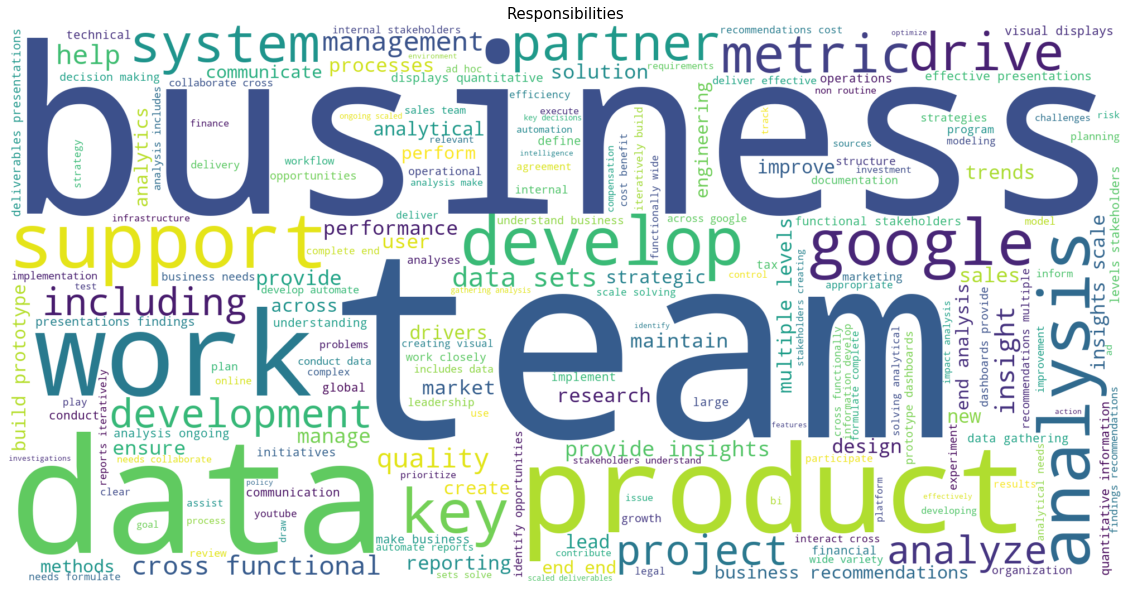

In [26]:
plot_cloud(df, 'Analyst', 'Normalized Responsibilities', 'Responsibilities')

As expected Analyst should  
1. work with a team  
1. support team with data analysis  
1. provide insights  
1. help to make  data-drive decisions

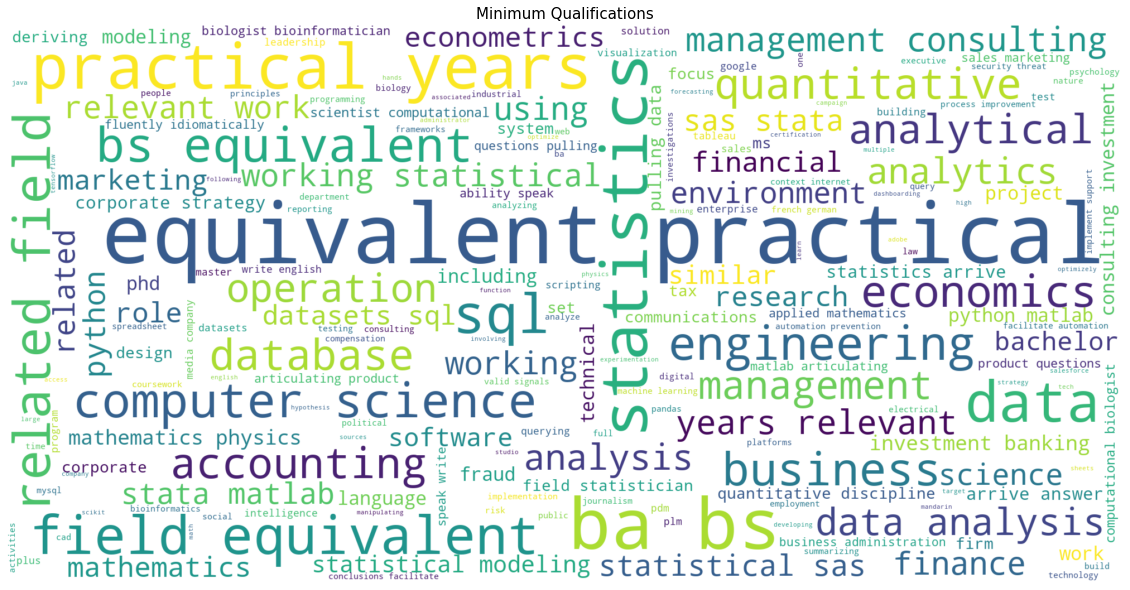

In [27]:
plot_cloud(df, 'Analyst', 'Normalized Minimum Qualifications', 'Minimum Qualifications')

Minimum Qualifications  
1. Bachelor degree in CS, Physics, Mathematics and etc  
1. Data analysis experience
1. Python, SQL (anther scripting languages)

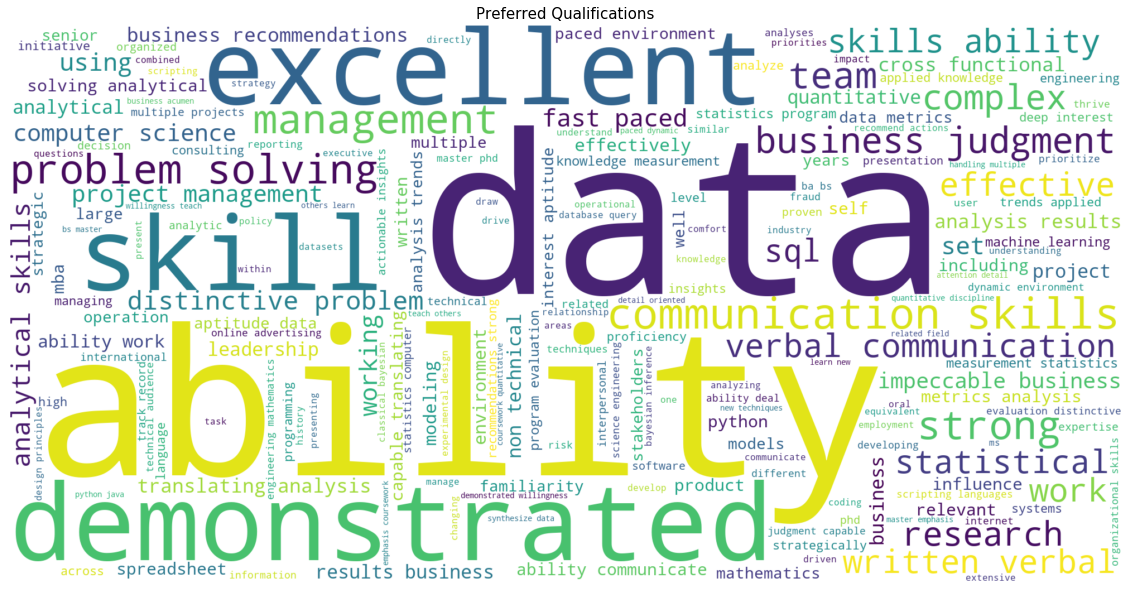

In [28]:
plot_cloud(df, 'Analyst', 'Normalized Preferred Qualifications', 'Preferred Qualifications')

In Preferred Qualifications we can see more soft-skills  
1. Problem solving  
1. Communication skills
1. Project management

### Engineer

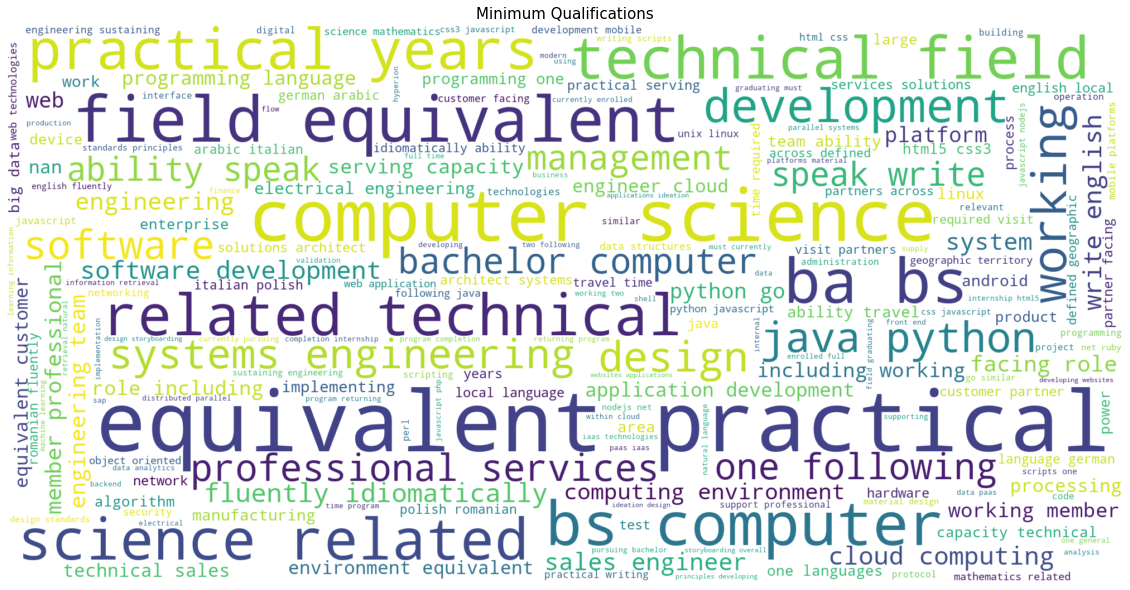

In [29]:
plot_cloud(df, 'Engineer', 'Normalized Minimum Qualifications', 'Minimum Qualifications')

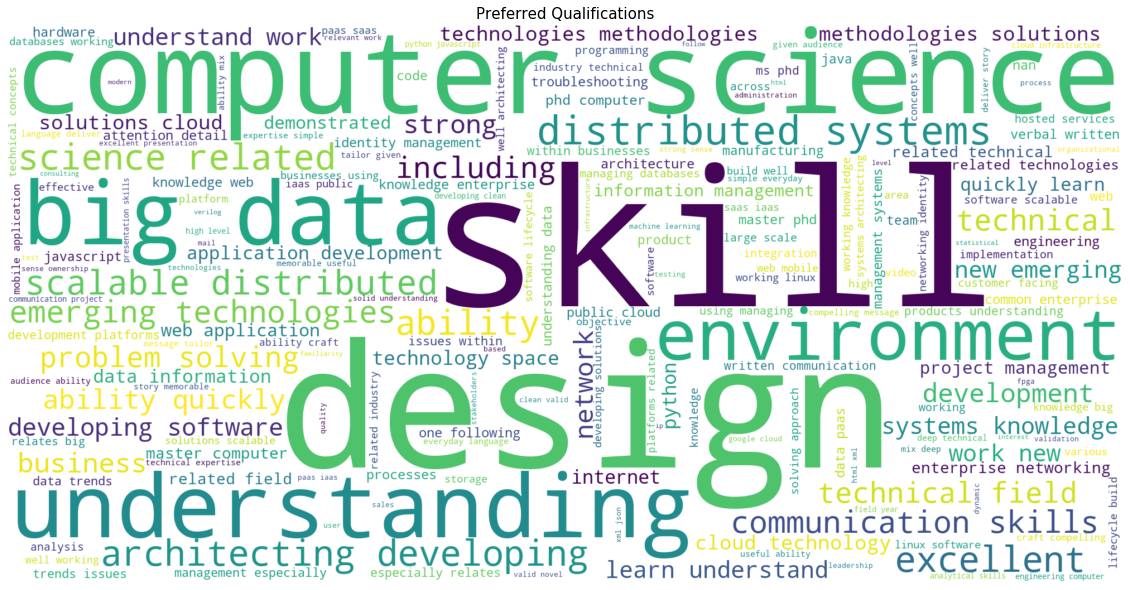

In [30]:
plot_cloud(df, 'Engineer', 'Normalized Preferred Qualifications', 'Preferred Qualifications')

### Office similarity

In [31]:
df['category'] = df.Category.astype('category')
df_category = (
    df[['Location', 'category']]
        .groupby('Location')['category']
        .value_counts()
        .rename('counter')
        .reset_index()
)

In [32]:
list_cat = list(set(df_category.category))
def category_embedings(x):
    emb = np.zeros(shape=len(list_cat))
    _dict = dict(zip(x.category, x.counter))
    for i, val in enumerate(list_cat):
        emb[i] = _dict.get(val, 0)
    return np.array(emb) / np.sum(emb)

In [35]:
df_category = (
    df_category
        .groupby(['Location'])
        .apply(lambda x: category_embedings(x))
        .rename('embedings')
        .reset_index()
)

In [227]:
import networkx as nx
from scipy.spatial.distance import cdist
mat_dist = cdist(
    np.array(df_category.embedings.to_list()),
    np.array(df_category.embedings.to_list()),
    metric='cosine',
)
list_loc = list(map(lambda x: x.split(',')[0], df_category.Location.to_list()))
G = nx.Graph()
threshold = 0.2
for i, name in enumerate(list_loc):
    G.add_node(name)
    for j in range(i+1, len(list_loc)):
        if mat_dist[i, j] < threshold:
            G.add_edge(name, list_loc[j], weight=1/(mat_dist[i, j]+0.0001))

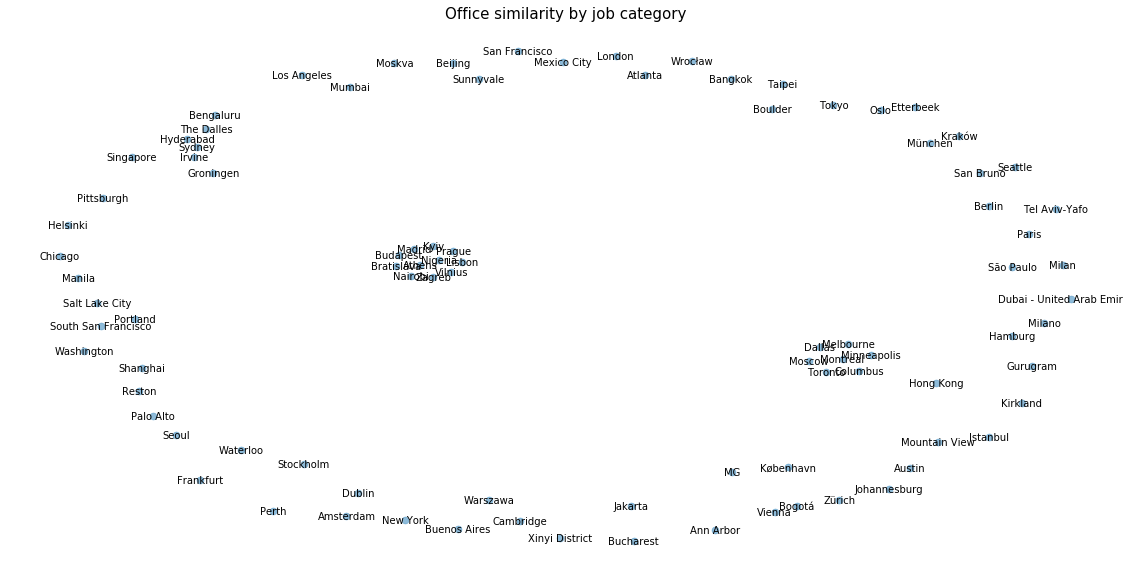

In [228]:
pos = nx.spring_layout(G, k=6) 
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.set_cmap('plasma')
plt.axis('off')
plt.title('Office similarity by job category', size=15)
plt.show()

#### More detailed

In [229]:
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
A = to_agraph(G)

In [230]:
A.draw('Graph.png',prog='sfdp', args='-Goverlap=prism')

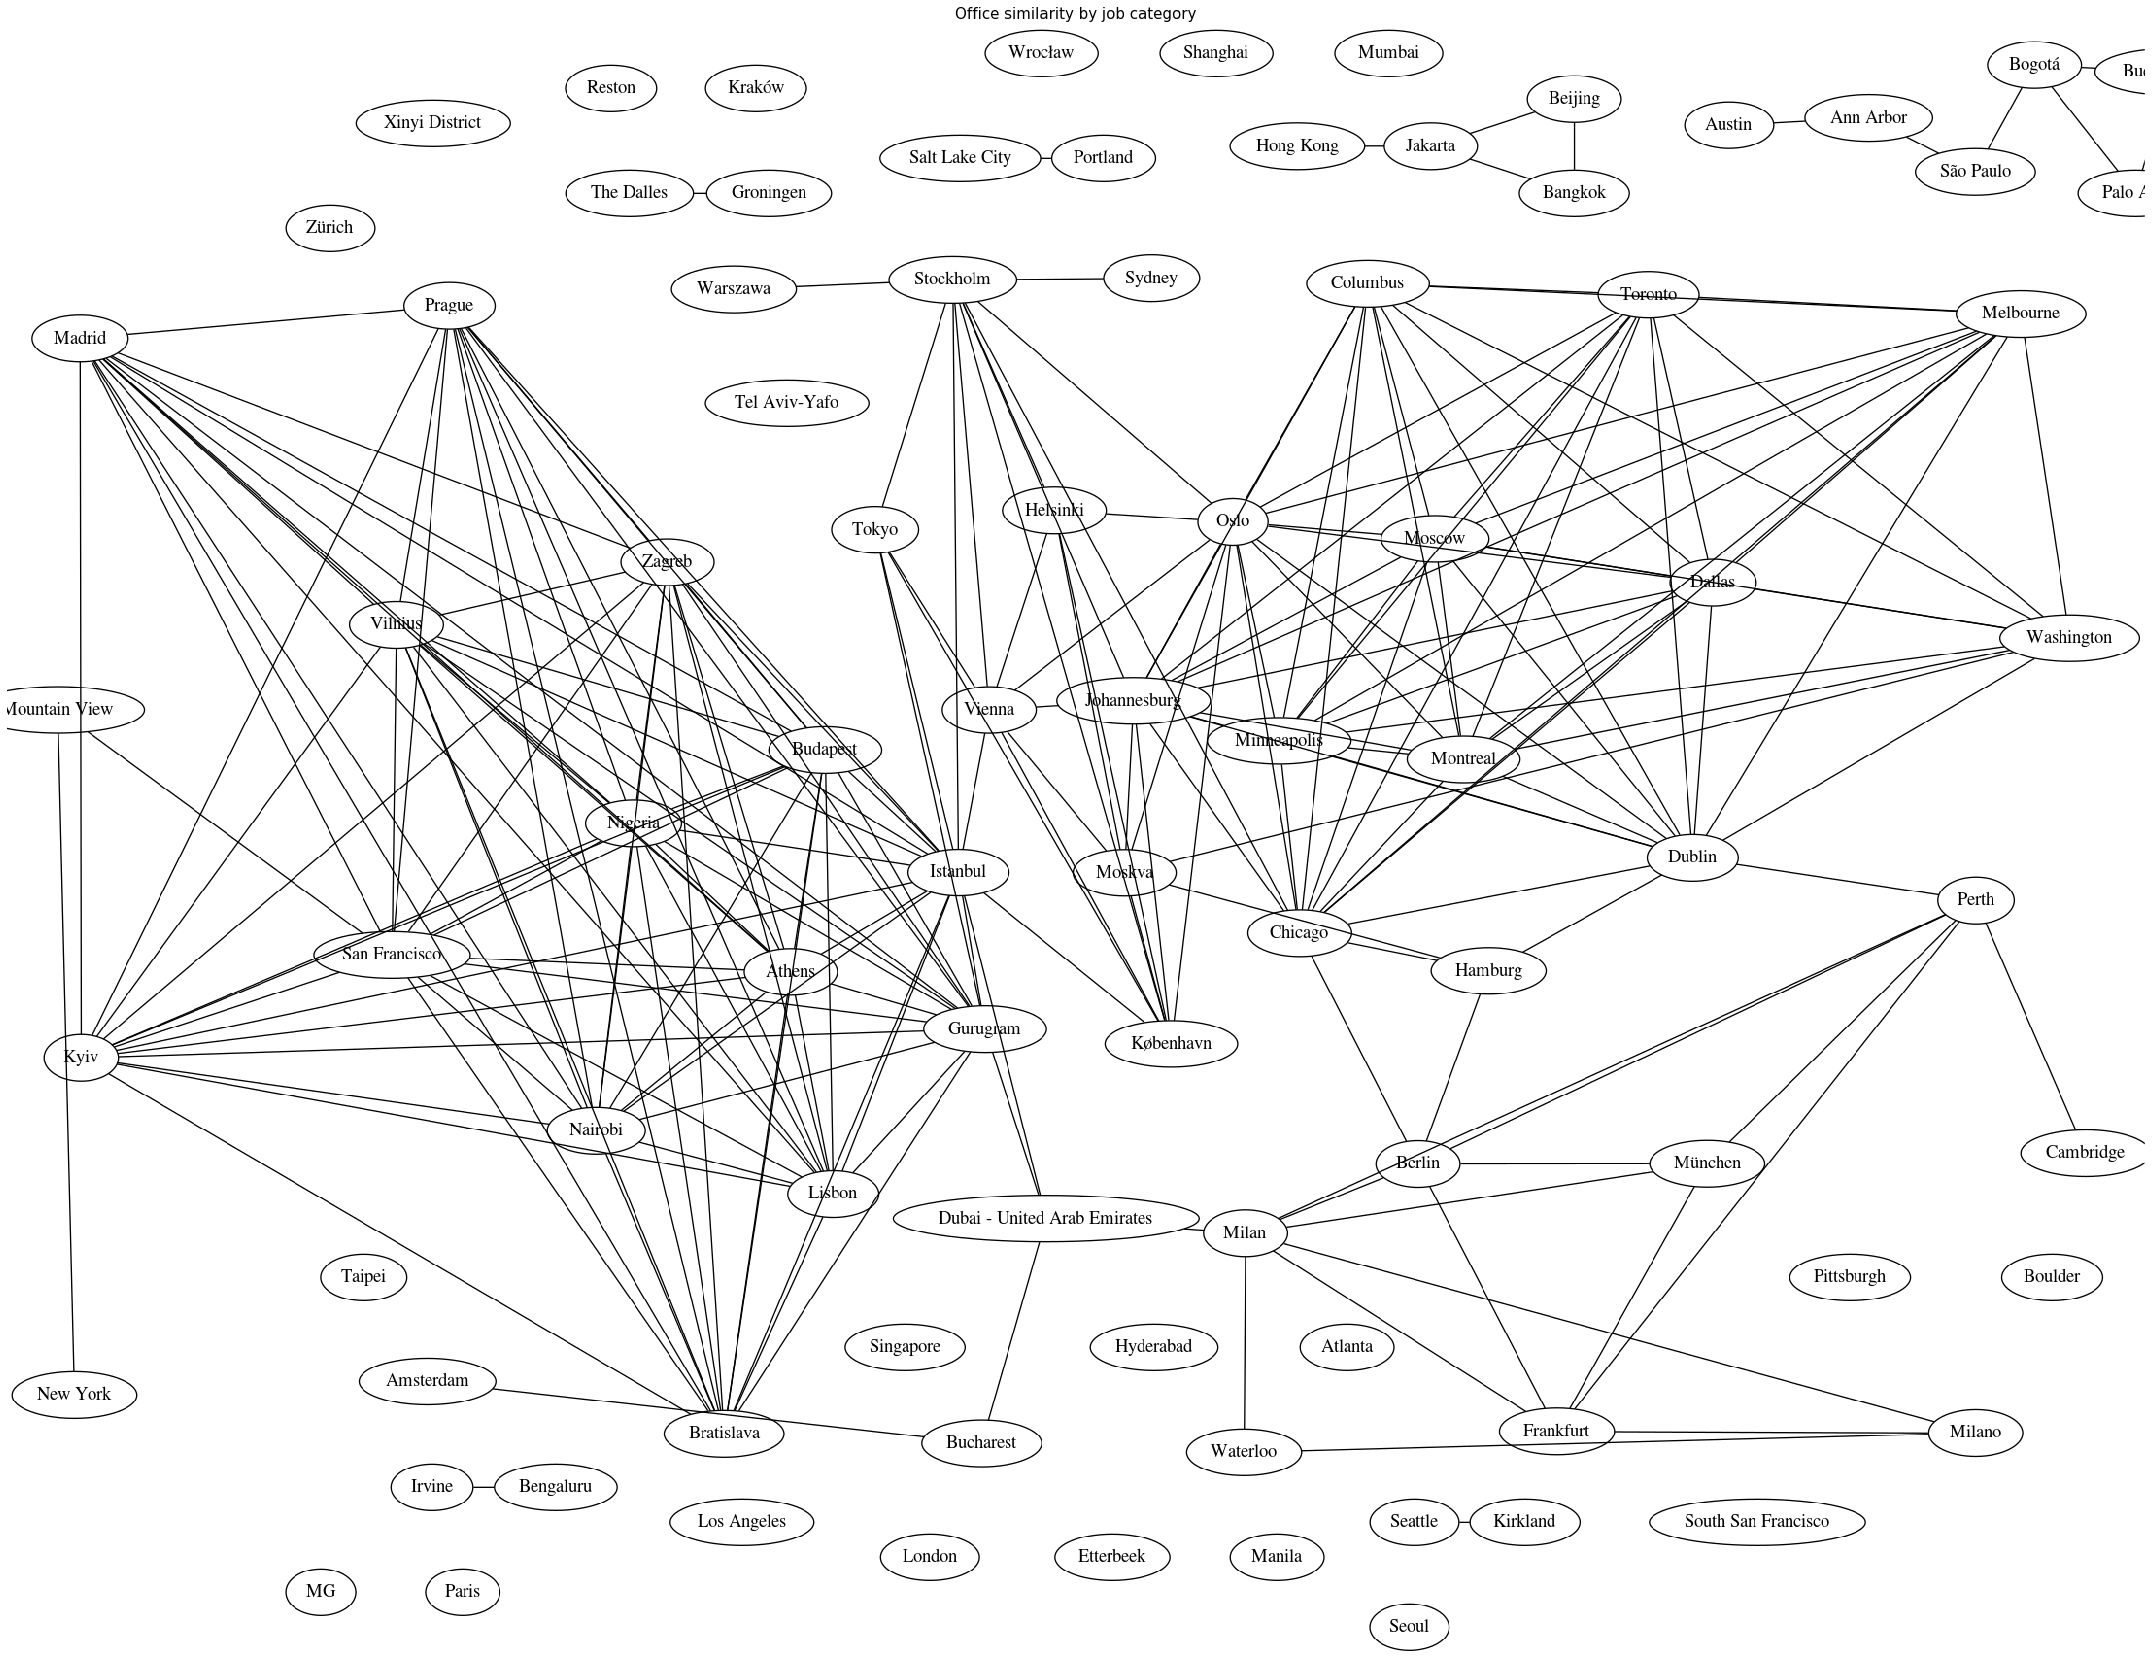

In [231]:
image = Image.open('./Graph.png')
plt.figure(figsize=(200,30))
plt.imshow(image)
plt.axis('off')
plt.title('Office similarity by job category', size=15)
plt.show()

There is some clusters on the first and second image. Mostly connection implies that similary office have not a lot offers and offers are the same. Or offices have massive recruitment camaign